In [22]:
from eptnr_package.eptnr.rewards import BaseReward, EgalitarianTheilReward
from eptnr_package.eptnr.constants.travel_metric import TravelMetric
from eptnr_package.eptnr.analysis.full_problem_exploration import full_problem_exploration
import igraph as ig
import numpy as np
import itertools as it
import geopandas as gpd
from matplotlib import pyplot as plt

# Data Generation

In [2]:
g = ig.Graph(directed=True)

In [3]:
V_O = {f'RC{i+1}':i for i in range(2)}
V_O_attr = {
    'name': [e for e in V_O.keys()],
    'x': [0, 1],
    'y': [0, 1],
    'color': ['purple', 'red'],
    'type': 'res_node'
}
g.add_vertices(V_O.values(), V_O_attr)

In [4]:
V_P = {f'PT{i+1}':e for i,e in enumerate(range(2,5))}
V_P_attr = {
    'name': [e for e in V_P.keys()],
    'x': [0.1, 0.5, 0.9],
    'y': [0.1, 0.5, 0.9],
    'color': 'blue',
    'type': 'pt_node'
}
g.add_vertices(V_P.values(), V_P_attr)

In [5]:
V_D = {f'POI{i+1}':e for i,e in enumerate(range(5,6))}
V_D_attr = {
    'name': [e for e in V_D.keys()],
    'x': [0.5],
    'y': [0.5],
    'color': 'green',
    'type': 'poi_node'
}
g.add_vertices(V_D.values(), V_D_attr)

## PTN Edges

In [6]:
# Speeds
WALKING_SPEED = 3  # units per hour
BUS_SPEED = 7  # units per hour
TRAIN_SPEED = 23      # units per hour

In [7]:
def compute_dist_from_es(es: list):
    positions = [(g.vs[e[0]]['x'], g.vs[e[0]]['y'], g.vs[e[1]]['x'], g.vs[e[1]]['y']) for e in es]
    pos_arr = np.array(positions)
    distance = np.sqrt((pos_arr[:,[0,2]].max(axis=1)-pos_arr[:,[0,2]].min(axis=1))**2+
                   (pos_arr[:,[1,3]].max(axis=1)-pos_arr[:,[1,3]].min(axis=1))**2)
    return np.round(distance, decimals=2)

### Walking

In [8]:
E_WALK = list(it.product(V_O.values(),V_P.values())) +\
         list(it.product(V_P.values(), V_D.values())) +\
         list(it.product(V_O.values(), V_D.values()))
distances_walk = compute_dist_from_es(E_WALK)
travel_time_walk = np.round((distances_walk * 1/WALKING_SPEED) * 60, decimals=2)
E_WALK_attr = {
    'distance': distances_walk,
    'tt': travel_time_walk,
    'weight': travel_time_walk,
    'color': 'gray',
    'type': 'walk',
}
g.add_edges(E_WALK, E_WALK_attr)

### PT

In [9]:
E_BUS = [
    (V_P['PT1'],V_P['PT2']),  # Bus_line_1
    (V_P['PT2'],V_P['PT1']),  # Bus_line_1
]
distances_bus = compute_dist_from_es(E_BUS)
travel_time_bus =np.round((distances_bus * 1/BUS_SPEED) * 60, decimals=2)
E_BUS_attr = {
    'name': list(it.repeat(f'Bus_line_1',2)) +
            list(it.repeat(f'Bus_line_2',2)),
    'distance': distances_bus,
    'tt': travel_time_bus,
    'weight': travel_time_bus,
    'color': 'pink',
    'type': 'bus',
}
g.add_edges(E_BUS, E_BUS_attr)

In [10]:
E_TRAIN = [
    (V_P['PT2'],V_P['PT3']),  # Train_line_1
    (V_P['PT3'],V_P['PT2']),  # Train_line_1
]
distances_train = compute_dist_from_es(E_TRAIN)
travel_time_train = np.round((distances_train * 1/TRAIN_SPEED) * 60, decimals=2)
E_TRAIN_attr = {
    'name': list(it.repeat(f'Train_line_1',2)),
    'distance': distances_train,
    'tt': travel_time_train,
    'weight': travel_time_train,
    'color': 'blue',
    'type': 'train',
}
g.add_edges(E_TRAIN, E_TRAIN_attr)

In [11]:
g.es['active'] = 1

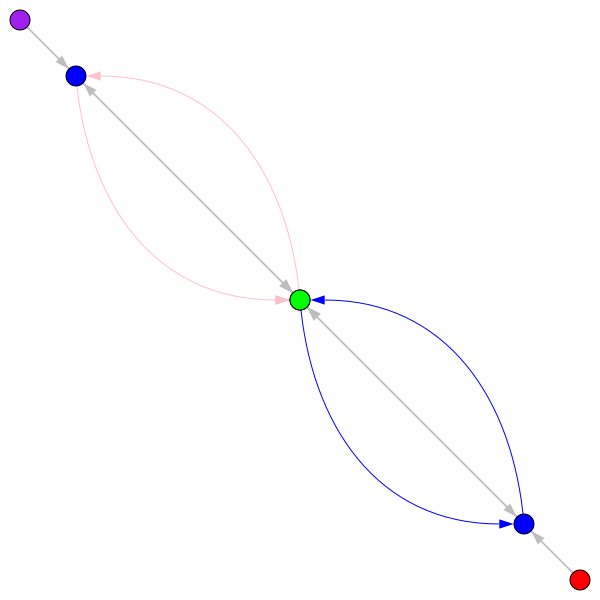

In [12]:
ig.plot(g)

## Census data

In [13]:
data = {
    'neighborhood': V_O_attr['name'],
    'n_inh': [1009,73],
    'n_purple': [997,0],
    'n_red': [1009-997,73],
    'geometry': gpd.points_from_xy(V_O_attr['x'], V_O_attr['y'])
}

gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [14]:
gdf

,neighborhood,n_inh,n_purple,n_red,geometry
0,RC1,1009,997,12,POINT (0.00000 0.00000)
1,RC2,73,0,73,POINT (1.00000 1.00000)


## Testing

In [15]:
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 0, {'distance': 0.14, 'tt': 2.8, 'weight': 2.8, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 1, {'distance': 0.71, 'tt': 14.2, 'weight': 14.2, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 2, {'distance': 1.27, 'tt': 25.4, 'weight': 25.4, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 3, {'distance': 1.27, 'tt': 25.4, 'weight': 25.4, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 4, {'distance': 0.71, 'tt': 14.2, 'weight': 14.2, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.Edge(<igraph.Graph object at 0x7f20d0559940>, 5, {'distance': 0.14, 'tt': 2.8, 'weight': 2.8, 'color': 'gray', 'type': 'walk', 'name': None, 'active': 1}),
 igraph.

# Evaluation

In [16]:
census_data = gdf
com_threshold = None
groups = ['red', 'purple']
metrics = [TravelMetric.TT]

reward = EgalitarianTheilReward(census_data=census_data,
                                com_threshold=com_threshold,
                                groups=groups,
                                metrics=metrics,
                                verbose=True)

In [17]:
solutions = full_problem_exploration(g, reward, edge_types=list(set([e for e in g.es['type'] if e != 'walk'])))

INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[11], [12], [13], [14]], [[11, 12], [11, 13], [11, 14], [12, 13], [12, 14], [13, 14]], [[11, 12, 13], [11, 12, 14], [11, 13, 14], [12, 13, 14]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=15
	n_vertices=6
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.007641376798835461
	scaled_reward=96.25137915938532
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:For state [] obtained rewards [96.25137915938532]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/

In [18]:
from eptnr.plotting.solution_plotting import plot_full_problem_exploration

In [19]:
solutions[0]

[[[]],
 [[11], [12], [13], [14]],
 [[11, 12], [11, 13], [11, 14], [12, 13], [12, 14], [13, 14]],
 [[11, 12, 13], [11, 12, 14], [11, 13, 14], [12, 13, 14]]]

(<Figure size 1600x1920 with 24 Axes>,
 array([[<AxesSubplot: title={'center': 'Reward: 96.2514'}>,
         <AxesSubplot: title={'center': 'Reward: 89.3032'}>,
         <AxesSubplot: title={'center': 'Reward: 89.3032'}>,
         <AxesSubplot: title={'center': 'Reward: 89.3032'}>],
        [<AxesSubplot: >,
         <AxesSubplot: title={'center': 'Reward: 96.2514'}>,
         <AxesSubplot: title={'center': 'Reward: 89.3032'}>,
         <AxesSubplot: title={'center': 'Reward: 100.0000'}>],
        [<AxesSubplot: >,
         <AxesSubplot: title={'center': 'Reward: 96.2514'}>,
         <AxesSubplot: title={'center': 'Reward: 100.0000'}>,
         <AxesSubplot: title={'center': 'Reward: 100.0000'}>],
        [<AxesSubplot: >,
         <AxesSubplot: title={'center': 'Reward: 91.9719'}>,
         <AxesSubplot: title={'center': 'Reward: 96.2514'}>,
         <AxesSubplot: title={'center': 'Reward: 91.9719'}>],
        [<AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: title={'center': 

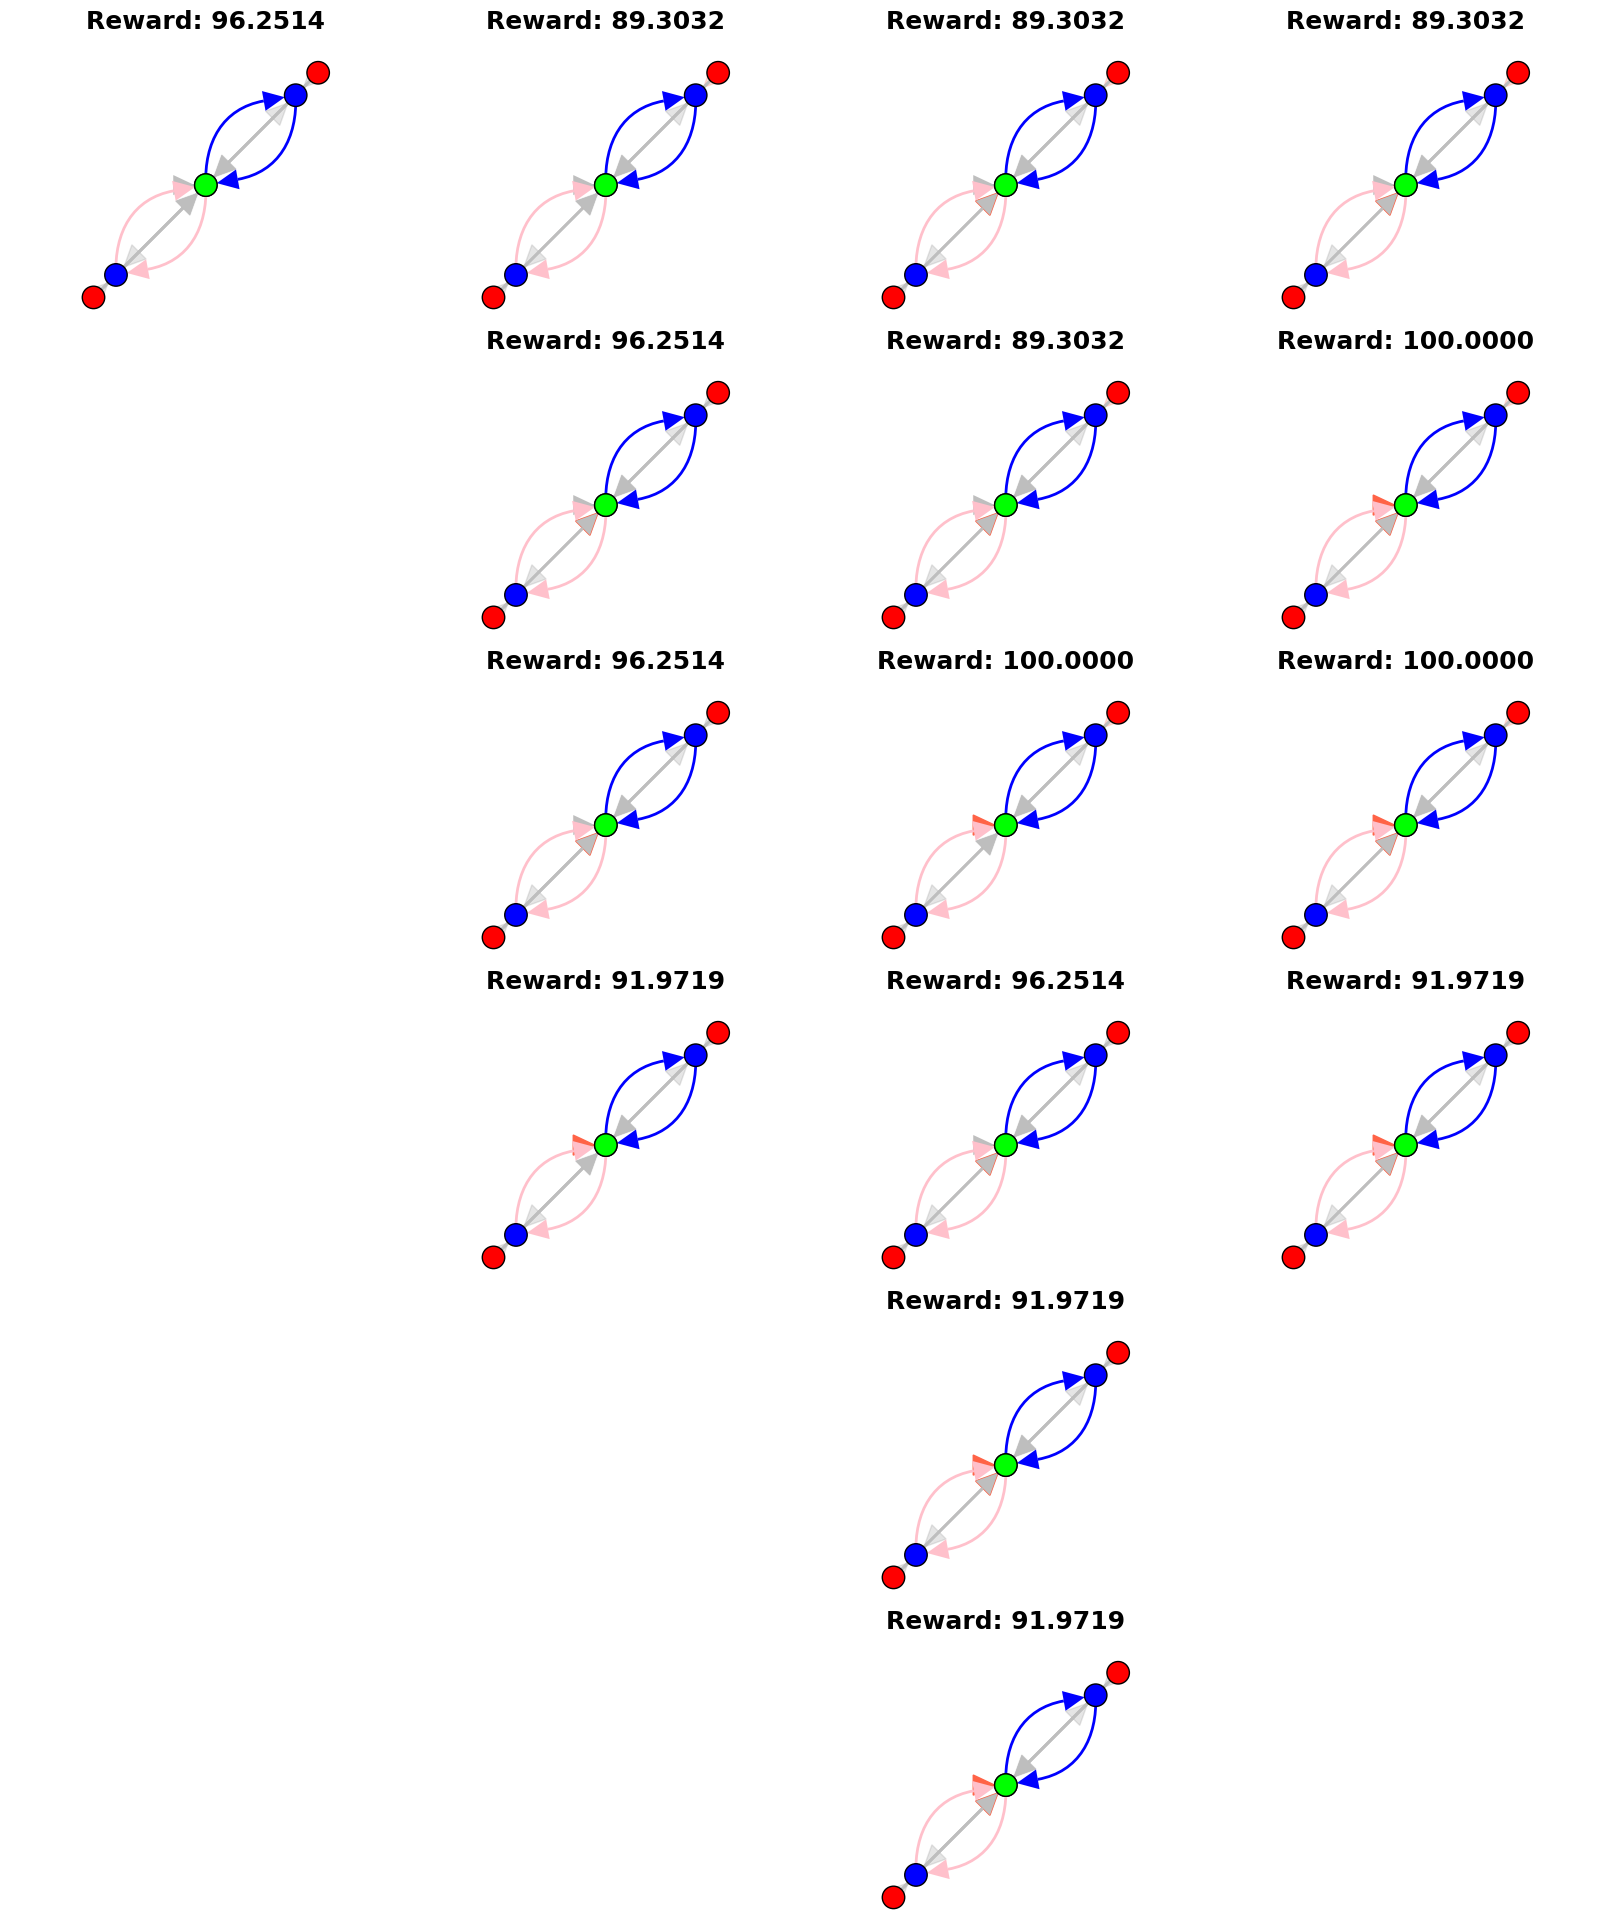

In [23]:
plot_full_problem_exploration(g, solutions[0], solutions[1])


In [21]:
solutions[1]

[[96.25137915938532],
 [89.30321561203776, 96.25137915938532, 96.25137915938532, 91.97192897530543],
 [89.30321561203776,
  89.30321561203776,
  100.00000000000007,
  96.25137915938532,
  91.97192897530543,
  91.97192897530543],
 [89.30321561203776,
  100.00000000000007,
  100.00000000000007,
  91.97192897530543]]